# Practical Data Science - Assignment 2

## Statlog (Heart) Analysis

 Data collected from UCI Machine Learning Library

### Attribute Information:

1. age       
2. sex       
3. chest pain type  (4 values)       
4. resting blood pressure  
5. serum cholestoral in mg/dl      
6. fasting blood sugar > 120 mg/dl       
7. resting electrocardiographic results  (values 0,1,2) 
8. maximum heart rate achieved  
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest   
11. the slope of the peak exercise ST segment     
12. number of major vessels (0-3) colored by flourosopy        
13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

### Attributes types

Real: 1,4,5,8,10,12 Ordered:11, Binary: 2,6,9 Nominal:7,3,13

## Variable to be predicted

Absence (1) or presence (2) of heart disease

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
column_names = ['age','sex','cp_type','resting_bp','serum_cholestoral',
                'fasting_bs','resting_ec','maximum_heart_rate',
                'angina','oldpeak','slope','major_vessels','thal','heart_disease']

heart = pd.read_csv('heart.dat', delimiter=' ', header=None, names=column_names, index_col=False)

In [3]:
heart.head()

,age,sex,cp_type,resting_bp,serum_cholestoral,fasting_bs,resting_ec,maximum_heart_rate,angina,oldpeak,slope,major_vessels,thal,heart_disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [4]:
heart.dtypes

age                   float64
sex                   float64
cp_type               float64
resting_bp            float64
serum_cholestoral     float64
fasting_bs            float64
resting_ec            float64
maximum_heart_rate    float64
angina                float64
oldpeak               float64
slope                 float64
major_vessels         float64
thal                  float64
heart_disease           int64
dtype: object

In [5]:
#checking the NaN values in the data set
heart.isnull().any()

age                   False
sex                   False
cp_type               False
resting_bp            False
serum_cholestoral     False
fasting_bs            False
resting_ec            False
maximum_heart_rate    False
angina                False
oldpeak               False
slope                 False
major_vessels         False
thal                  False
heart_disease         False
dtype: bool

## TASK-2 Data Exploration

### 1.Age

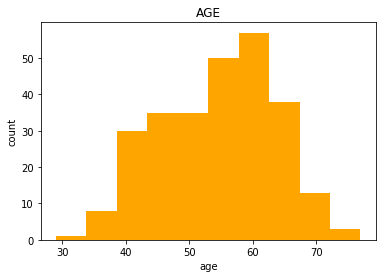

In [6]:

heart['age'].plot(kind='hist',bins=10,color='orange')

plt.title( 'AGE')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

In [7]:
heart.sex.unique()

array([1., 0.])

### 2.Sex

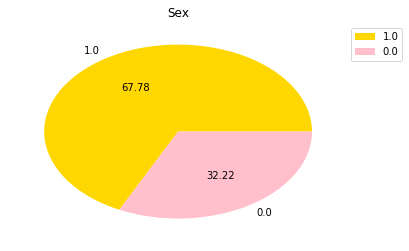

In [8]:
heart['sex'].value_counts().plot(kind='pie',autopct='%.2f',colors=['gold','pink']) 
plt.legend(bbox_to_anchor=(1.0,1.0))

plt.title('Sex')
plt.xlabel('')
plt.ylabel('')

plt.show()

### 3.Chest Pain Type

In [9]:
heart.cp_type.unique()

array([4., 3., 2., 1.])

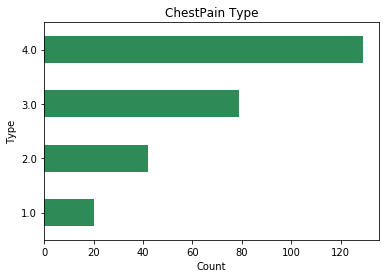

In [10]:
pd.value_counts(heart['cp_type'].values, sort=True, ascending=True).plot(kind='barh', color='seagreen')
plt.title('ChestPain Type')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()

### 4.Resting Blood Pressure

In [11]:
heart.resting_bp.unique()

array([130., 115., 124., 128., 120., 110., 140., 150., 135., 142., 134.,
       112., 132., 138., 160., 170., 144., 122., 152., 101., 126., 118.,
       136., 105., 174., 145., 108., 156., 106., 104.,  94., 146., 148.,
       178., 125., 100., 165., 180., 158., 200., 117., 192., 123., 129.,
       102., 155., 172.])

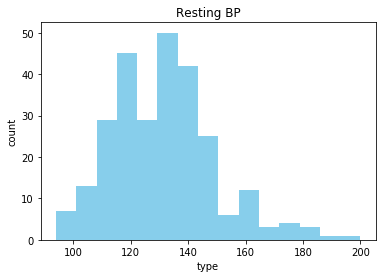

In [12]:
heart['resting_bp'].plot(kind='hist',bins=15,color='skyblue')

plt.title( 'Resting BP')
plt.xlabel('type')
plt.ylabel('count')
plt.show()

### 5.Serum Cholestoral 

In [13]:
heart.serum_cholestoral.unique()

array([322., 564., 261., 263., 269., 177., 256., 239., 293., 407., 234.,
       226., 235., 303., 149., 311., 203., 211., 199., 229., 245., 204.,
       288., 275., 243., 295., 230., 265., 228., 215., 326., 200., 207.,
       273., 180., 222., 223., 209., 233., 197., 218., 246., 225., 315.,
       205., 417., 195., 198., 166., 178., 249., 281., 126., 305., 240.,
       276., 319., 242., 260., 354., 309., 208., 236., 270., 214., 201.,
       244., 306., 221., 330., 266., 206., 212., 302., 313., 141., 237.,
       289., 254., 274., 258., 160., 327., 304., 271., 283., 188., 286.,
       360., 267., 196., 232., 277., 210., 213., 282., 167., 224., 268.,
       250., 219., 217., 308., 193., 231., 262., 259., 325., 299., 182.,
       294., 298., 409., 172., 184., 394., 174., 255., 248., 300., 318.,
       216., 252., 227., 220., 168., 183., 341., 186., 307., 164., 257.,
       321., 264., 253., 185., 290., 175., 353., 335., 247., 340., 284.,
       192.])

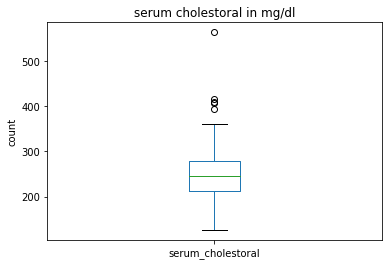

In [14]:
heart['serum_cholestoral'].plot(kind='box')
plt.title( ' serum cholestoral in mg/dl ')
plt.ylabel('count')
plt.show()

### 6.Fasting Blood Sugar

In [15]:
heart.fasting_bs.unique()

array([0., 1.])

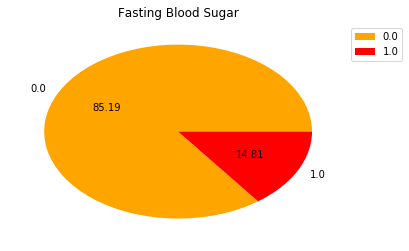

In [16]:
heart['fasting_bs'].value_counts().plot(kind='pie',autopct='%.2f',colors=['orange','red'])  
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title('Fasting Blood Sugar')
plt.xlabel('')
plt.ylabel('')

plt.show()

### 7.Resting Electrocardiographic Results

In [17]:
heart.resting_ec.unique()

array([2., 0., 1.])

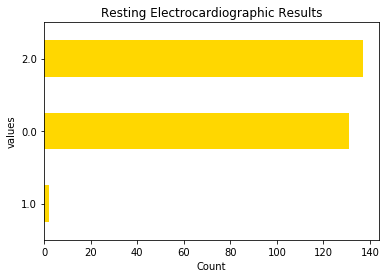

In [18]:
pd.value_counts(heart['resting_ec'].values, sort=True, ascending=True).plot(kind='barh', color='gold')
plt.title('Resting Electrocardiographic Results')
plt.xlabel('Count')
plt.ylabel('values')
plt.show()

### 8.Maximum Heart-Rate Achieved

In [19]:
heart.maximum_heart_rate.unique()

array([109., 160., 141., 105., 121., 140., 142., 170., 154., 161., 111.,
       180., 145., 159., 125., 120., 155., 144., 178., 129., 181., 143.,
       139., 152., 157., 165., 130., 150., 138., 126., 186., 163., 179.,
       156., 134., 177., 114., 184., 175., 168.,  96., 103., 173., 169.,
       171., 112., 149., 116., 147., 148., 128., 164., 108., 118., 151.,
       133., 162.,  71., 124., 166., 117., 153.,  88.,  99., 158., 132.,
       172., 192., 182., 195.,  95., 167., 122., 174., 131., 146., 115.,
       106., 194., 187., 202., 127.,  97., 136., 190., 185., 113., 188.,
       123., 137.])

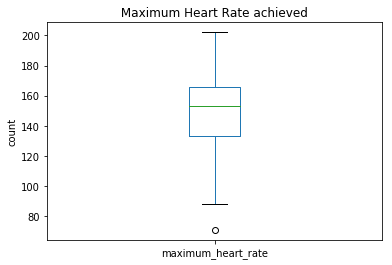

In [20]:
heart['maximum_heart_rate'].plot(kind='box')
plt.title( ' Maximum Heart Rate achieved ')
plt.ylabel('count')
plt.show()

### 9.Exercise Induced Angina

In [21]:
heart.angina.unique()

array([0., 1.])

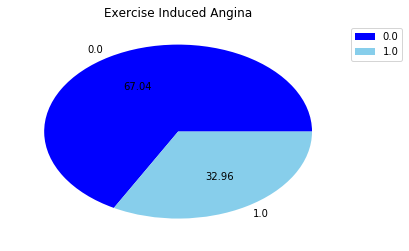

In [22]:
heart['angina'].value_counts().plot(kind='pie',autopct='%.2f',colors=['blue','skyblue'])  
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title('Exercise Induced Angina')
plt.xlabel('')
plt.ylabel('')

plt.show()

### 10.Oldpeak

In [23]:
heart.oldpeak.unique()

array([2.4, 1.6, 0.3, 0.2, 0.4, 0.6, 1.2, 4. , 0.5, 0. , 2.6, 1.8, 3.1,
       1.4, 0.1, 2.5, 2.3, 3.4, 0.9, 1.9, 2.2, 0.8, 1. , 3.6, 1.1, 3. ,
       2. , 1.5, 4.2, 3.2, 0.7, 5.6, 3.8, 2.1, 2.9, 2.8, 3.5, 6.2, 1.3])

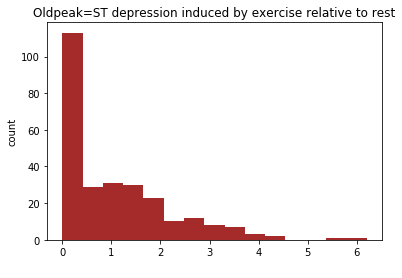

In [24]:
heart['oldpeak'].plot(kind='hist',bins=15,color='brown')

plt.title( 'Oldpeak=ST depression induced by exercise relative to rest')
plt.xlabel(' ')
plt.ylabel('count')
plt.show()

### 11. Slope of the peak exercise ST segment

In [25]:
heart.slope.unique()

array([2., 1., 3.])

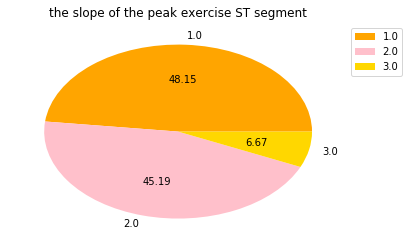

In [26]:
heart['slope'].value_counts().plot(kind='pie',autopct='%.2f',colors=['orange','pink','gold']) 
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title('the slope of the peak exercise ST segment')
plt.xlabel('')
plt.ylabel('')

plt.show()

### 12. No.of Major vessels (0-3) colored by flourosopy

In [27]:
heart.major_vessels.unique()

array([3., 0., 1., 2.])

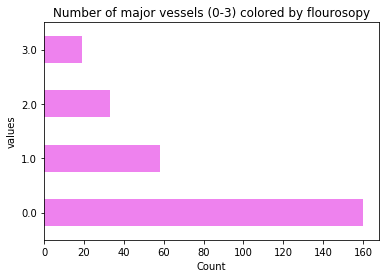

In [28]:
pd.value_counts(heart['major_vessels'].values, sort=True, ascending=False).plot(kind='barh', color='violet')
plt.title('Number of major vessels (0-3) colored by flourosopy')
plt.xlabel('Count')
plt.ylabel('values')
plt.show()

### 13.Thal

In [29]:
heart.thal.unique()

array([3., 7., 6.])

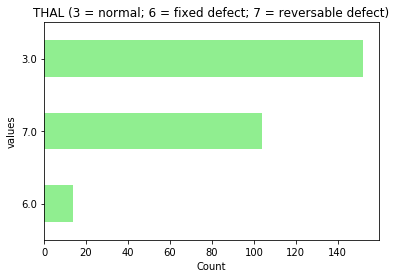

In [30]:
pd.value_counts(heart['thal'].values, sort=True, ascending=True).plot(kind='barh', color='lightgreen')
plt.title('THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)')
plt.xlabel('Count')
plt.ylabel('values')
plt.show()

## COMPARISION

Text(0,0.5,'count')

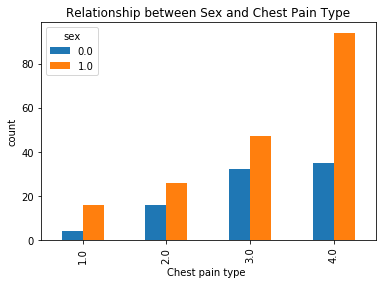

In [31]:
pd.crosstab(index=heart["cp_type"], columns=heart['sex']).plot(kind='bar')
plt.title(f'Relationship between Sex and Chest Pain Type')
plt.xlabel('Chest pain type ')
plt.ylabel('count')

Text(0,0.5,'count')

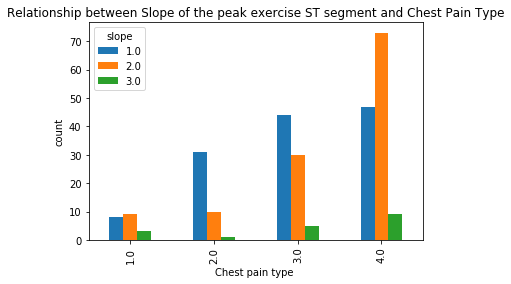

In [32]:
pd.crosstab(index=heart["cp_type"], columns=heart['slope']).plot(kind='bar')
plt.title(f'Relationship between Slope of the peak exercise ST segment and Chest Pain Type')
plt.xlabel('Chest pain type ')
plt.ylabel('count')

Text(0,0.5,'count')

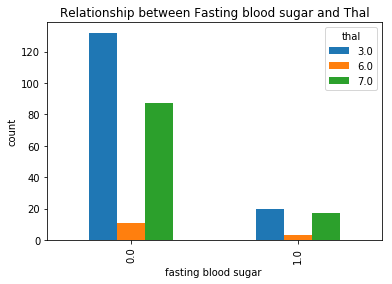

In [33]:
pd.crosstab(index=heart["fasting_bs"], columns=heart['thal']).plot(kind='bar')
plt.title(f'Relationship between Fasting blood sugar and Thal')
plt.xlabel('fasting blood sugar ')
plt.ylabel('count')

Text(0,0.5,'count')

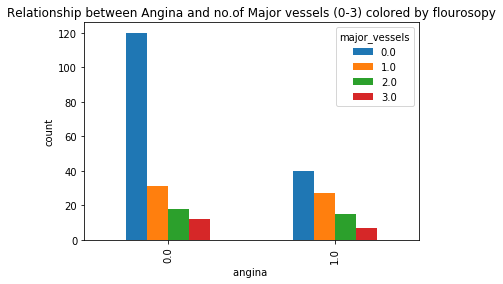

In [34]:
pd.crosstab(index=heart["angina"], columns=heart['major_vessels']).plot(kind='bar')
plt.title(f'Relationship between Angina and no.of Major vessels (0-3) colored by flourosopy')
plt.xlabel('angina ')
plt.ylabel('count')